In [2]:
data = read.csv("AirPassengers.csv")
head(data)

Month,Passengers
Jan-49,112
Feb-49,118
Mar-49,132
Apr-49,129
May-49,121
Jun-49,135


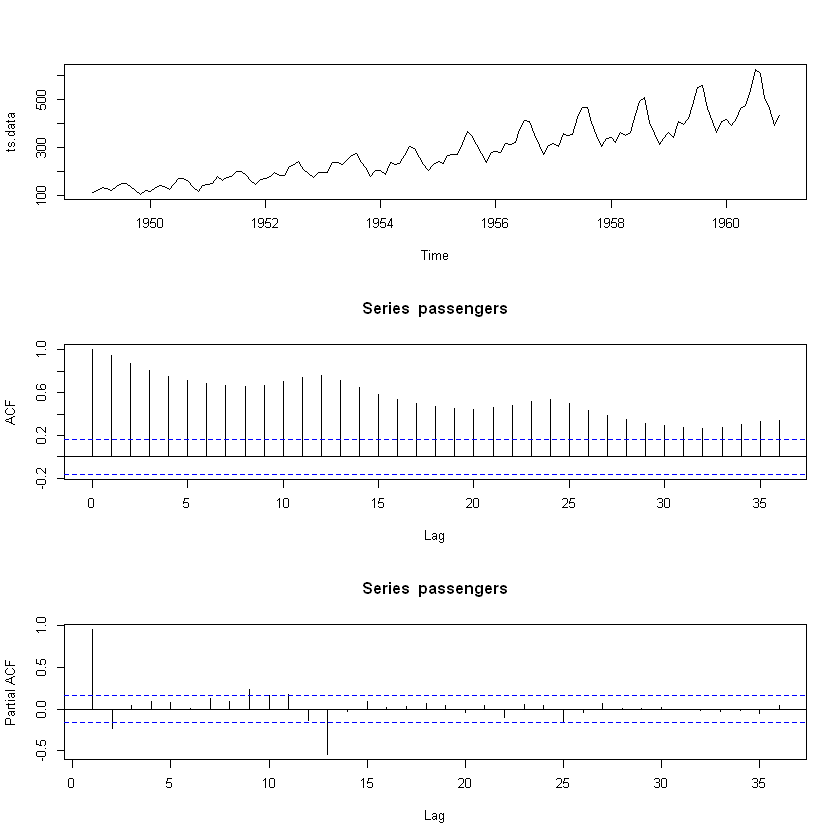

In [3]:
passengers <- data$Passengers
ts.data <- ts(passengers, start = c(1949, 1), frequency = 12)
par(mfcol = c(3, 1))
plot(ts.data)
acf(passengers, lag = 36)
pacf(passengers, lag = 36)

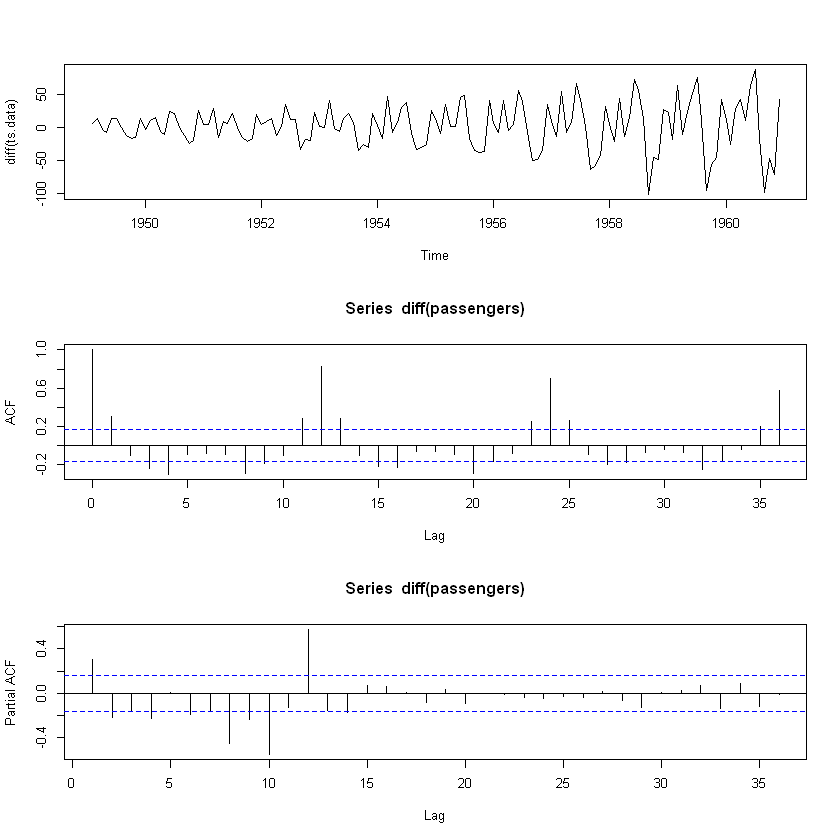

In [4]:
par(mfcol = c(3, 1))
plot(diff(ts.data))
acf(diff(passengers), lag = 36)
pacf(diff(passengers), lag = 36)

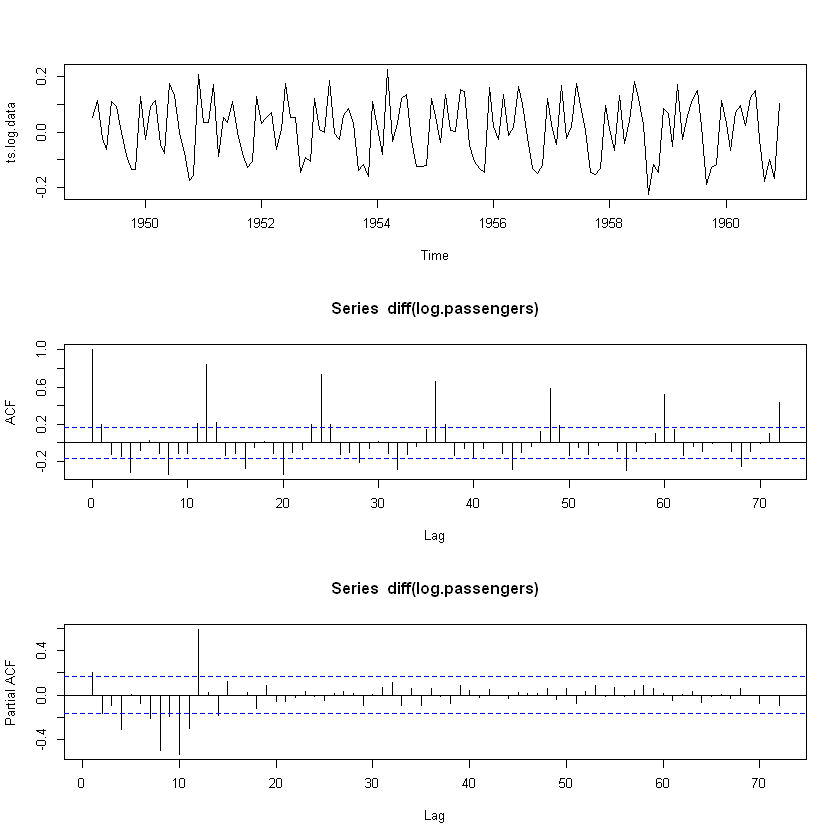

In [3]:
log.passengers <- log(passengers)
ts.log.data <- ts(diff(log.passengers), start = c(1949, 2), frequency = 12)
par(mfcol = c(3, 1))
plot(ts.log.data)
acf(diff(log.passengers), lag = 72)
pacf(diff(log.passengers), lag = 72)

In [5]:
library(ggplot2)
library(ggfortify)
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fitted.fracdiff        fracdiff 
  fortify.ts             ggfortify
  residuals.ar           ggfortify
  residuals.fracdiff     fracdiff 


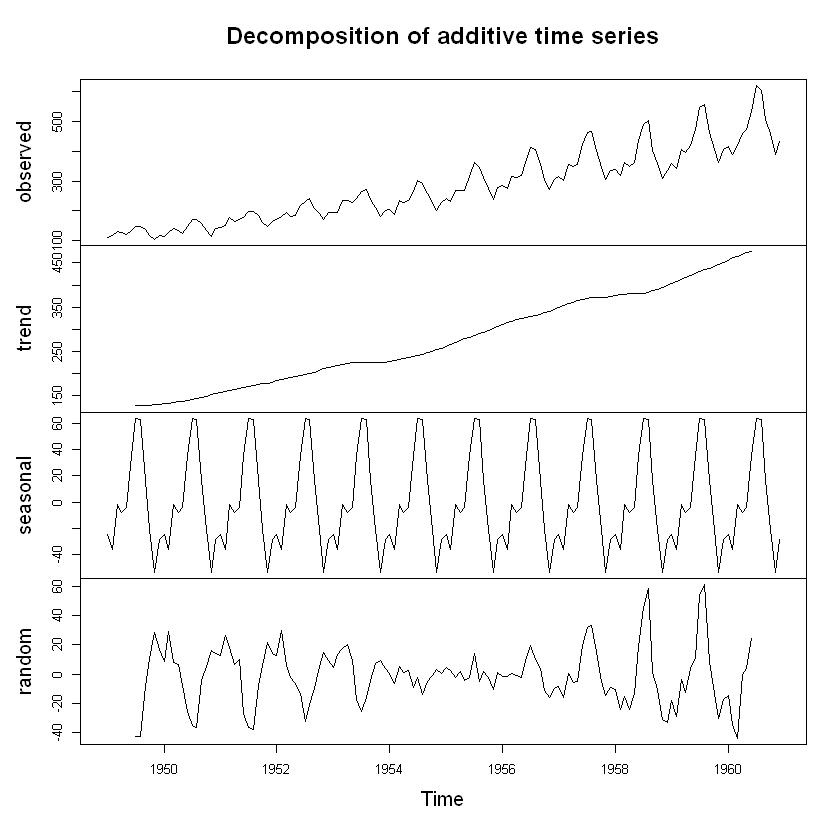

In [6]:
decompose.ts.data <- decompose(ts.data)
plot(decompose.ts.data)

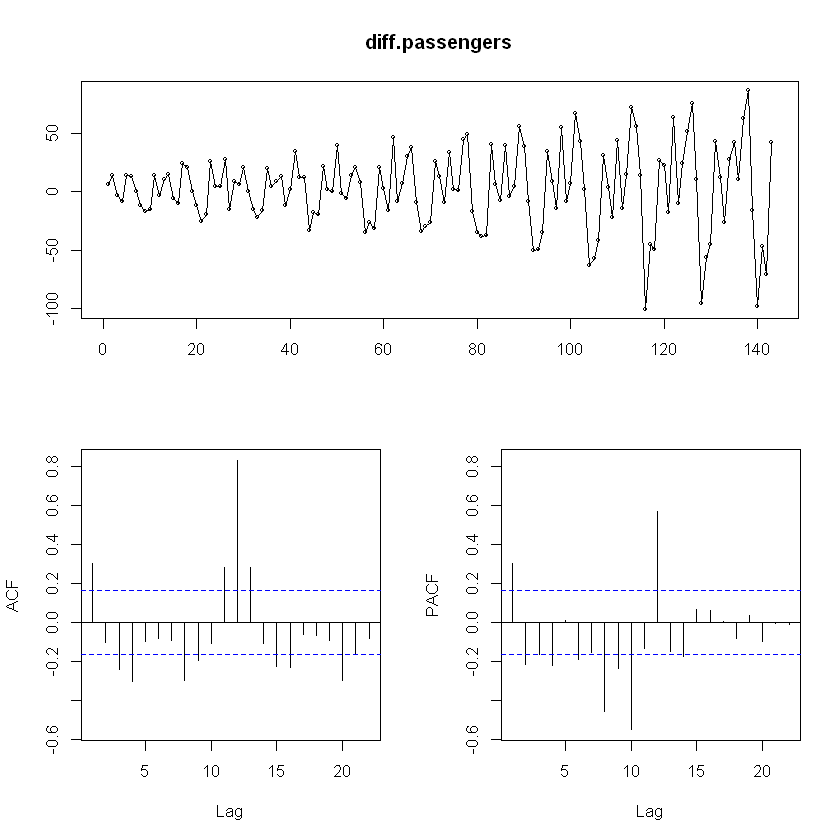

In [7]:
diff.passengers <- diff(passengers)
tsdisplay(diff.passengers)

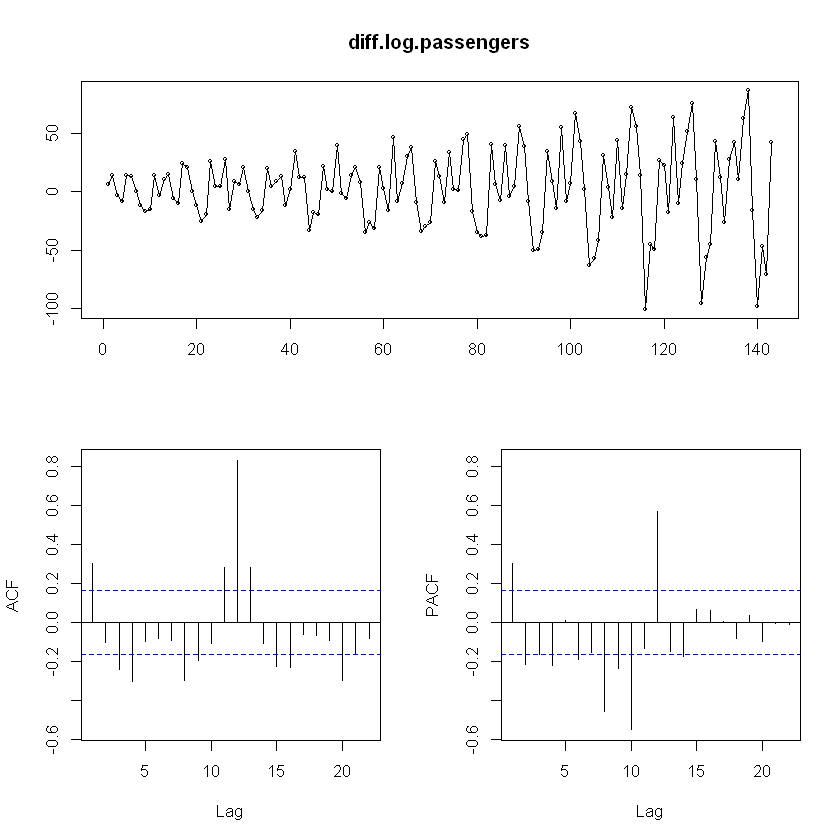

In [8]:
diff.log.passengers <- diff(log.passengers)
tsdisplay(diff.log.passengers)

In [9]:
train <- data[1:132, 2]
test <- data[133:144, 2]
train <- ts(train, start = c(1949, 1), frequency = 12)
test <- ts(test, start = c(1960, 1), frequency = 12)


 ARIMA(2,1,2)(1,1,1)[12]                    : Inf
 ARIMA(0,1,0)(0,1,0)[12]                    : 905.0994
 ARIMA(1,1,0)(1,1,0)[12]                    : 901.0318
 ARIMA(0,1,1)(0,1,1)[12]                    : 901.9297
 ARIMA(1,1,0)(0,1,0)[12]                    : 900.0056
 ARIMA(1,1,0)(0,1,1)[12]                    : 901.2611
 ARIMA(1,1,0)(1,1,1)[12]                    : Inf
 ARIMA(2,1,0)(0,1,0)[12]                    : 901.5463
 ARIMA(1,1,1)(0,1,0)[12]                    : 901.1803
 ARIMA(0,1,1)(0,1,0)[12]                    : 900.7887
 ARIMA(2,1,1)(0,1,0)[12]                    : 903.3176

 Best model: ARIMA(1,1,0)(0,1,0)[12]                    



Series: train 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.2431
s.e.   0.0894

sigma^2 estimated as 109.8:  log likelihood=-447.95
AIC=899.9   AICc=900.01   BIC=905.46

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.579486,9.907267,7.483159,0.1187348,2.880429,0.2457523,0.01227544,NA
Test set,-16.986385,23.931703,18.527682,-3.9334909,4.182395,0.6084625,0.04802038,0.5336134


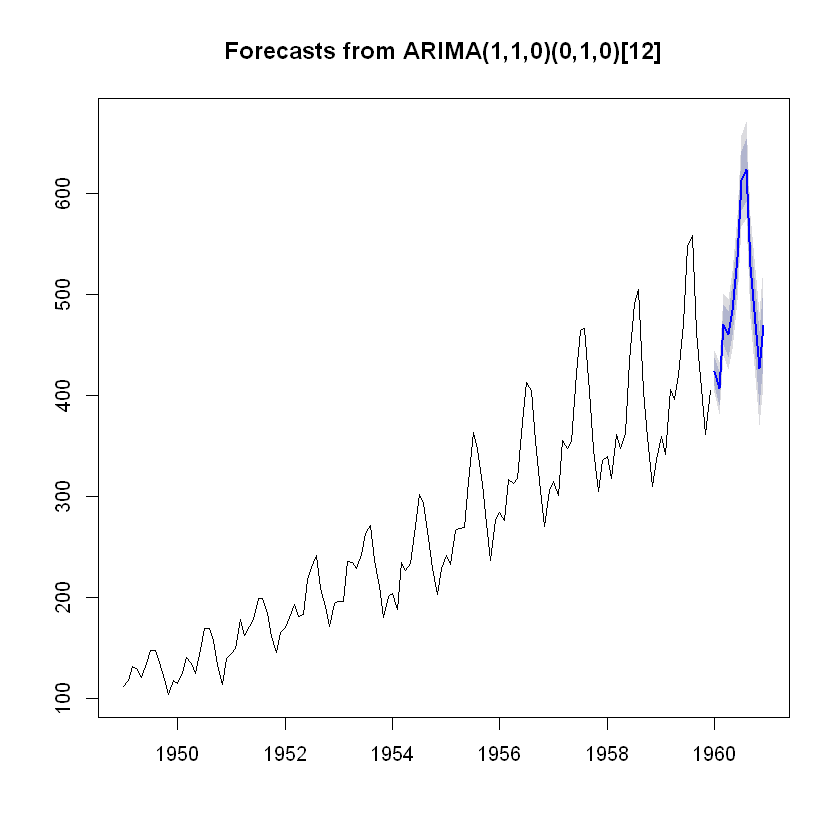

In [10]:
auto.arima.fit <- auto.arima(train, trace = T)
auto.arima.fit
arima.forecast <- forecast(auto.arima.fit, h = 12)
plot(arima.forecast)
accuracy(arima.forecast, test)

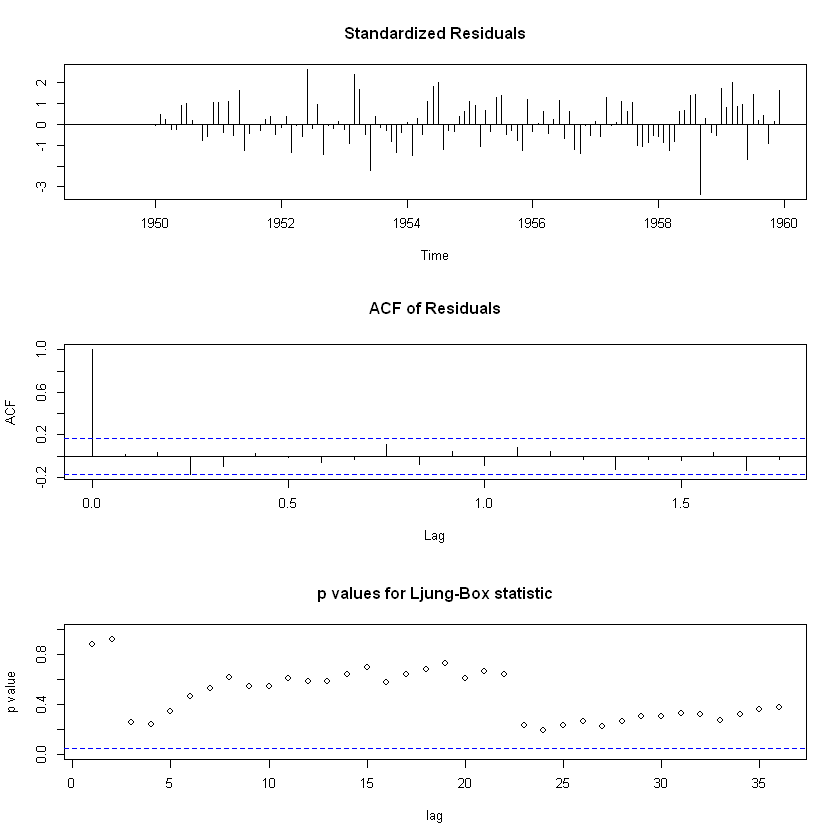

In [11]:
tsdiag(auto.arima.fit, gof = 36)